In [31]:
from functions import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
from inputs import get_gamepad
import win32gui
import win32ui
import win32con
import win32process
import win32api
import cv2
import scipy.misc
import imageio
import pywin
import math
import threading
import math

In [2]:
import pandas as pd

In [3]:
import time

In [4]:
from tqdm import tqdm

In [33]:
from XboxController import *

# Find your emulator PID

In [6]:
# colocar aqui o PID do processo do emulador
pid = 8468

In [7]:
def enum_window_callback(hwnd, pid):
    tid, current_pid = win32process.GetWindowThreadProcessId(hwnd)
    if pid == current_pid and win32gui.IsWindowVisible(hwnd):
        windows.append(hwnd)

In [8]:
windows = []
win32gui.EnumWindows(enum_window_callback, pid)

# Now windows variable contains a list of hwnds of notepad

# Output of captions of the found windows:
print([win32gui.GetWindowText(item) for item in windows])

['Gens - Genesis : OUTRUN                                          ']


In [9]:
process_name = [win32gui.GetWindowText(item) for item in windows][0]

Fim

In [10]:
width = 330#320
height = 300#280
left = 0
top = 0

In [34]:
controller = XboxController()

Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\vinic\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\vinic\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\vinic\Documents\OUTRUN\XboxController.py", line 55, in _monitor_controller
    events = get_gamepad()
  File "C:\Users\vinic\Anaconda3\lib\site-packages\inputs.py", line 3679, in get_gamepad
    return gamepad.read()
  File "C:\Users\vinic\Anaconda3\lib\site-packages\inputs.py", line 2517, in read
    return next(iter(self))
  File "C:\Users\vinic\Anaconda3\lib\site-packages\inputs.py", line 2686, in __iter__
    self.__check_state()
  File "C:\Users\vinic\Anaconda3\lib\site-packages\inputs.py", line 2696, in __check_state
    "Gamepad %d is not connected" % self.__device_number)
inputs.UnpluggedError: Gamepad 0 is not connected

Exception in thread Thread-6:
Traceback (most recent call last):
  F

In [12]:
def get_program_image_and_key(con):
    hwnd = win32gui.FindWindow(None, process_name)
    wDC = win32gui.GetWindowDC(hwnd)
    dcObj=win32ui.CreateDCFromHandle(wDC)
    cDC=dcObj.CreateCompatibleDC()

    bmp = win32ui.CreateBitmap()
    bmp.CreateCompatibleBitmap(dcObj, width, height)
    cDC.SelectObject(bmp)
    cDC.BitBlt((0, 0), (width, height), dcObj, (left, top), win32con.SRCCOPY)

    signedIntsArray = bmp.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (height,width,4)
    img = img[60:280,7:327,[2,1,0]]
    
    #salvando imagem, se eu quiser
    #scipy.misc.imsave('.\Screenshot\\' +str(i)+ '.png',img)
    
    # Free Resources
    dcObj.DeleteDC()
    cDC.DeleteDC()
    win32gui.ReleaseDC(hwnd, wDC)
    win32gui.DeleteObject(bmp.GetHandle())
    return img, con.read()

In [17]:
seqimg = []

In [18]:
seqcmds = []

In [ ]:
for i in tqdm(range(1000)):
    img, controls =  get_program_image_and_key(controller)
    seqimg.append(img)
    seqcmds.append(controls)
    time.sleep(1)

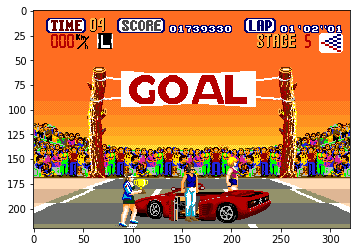

In [28]:
plt.imshow(seqimg[730])

In [27]:
seqcmds[730]

[0, 0, 0, 0]

In [29]:
with open('./Screenshot/img2.pkl','wb') as f:
    pickle.dump(seqimg, f)

with open('./Screenshot/comando2.pkl','wb') as f:
    pickle.dump(seqimg, f)

# End of movement recording